In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.transforms import Bbox
plt.style.use('ggplot')
import os


# ggplot style C1=#348ABD
c1 = np.array([52,138,189]) / 255

rgb = lambda x: np.array(matplotlib.colors.to_rgb(x))

import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition, mark_inset

models=['3e0f73-237.pt', '319859-108.pt', '7e3c4a-39.pt', 'ee7818-12.pt', 'd06424-79.pt']
model_names=['All', 'random 8', 'diagonal 8', 'completely random 8', 'edge 8']
columns = ['Sampling', 'Model', 'Log MSE']

data_h2=[]
data_ch4=[]

for i, model in enumerate(models):
    print("evalulating model {} {}".format(i, model))
    os.system("python evaluate.py ../data/iza/hydrogen/iza_hydrogen.npy output/{}".format(model))
    data = np.genfromtxt('nn-latents.csv',delimiter=",")
    #print(data)
    logMSE = np.log10(data[:, -1])
    #logMSE=logMSE.reshape((logMSE.shape[0],1))
    print(logMSE.shape)
    #data_h2.append(logMSE)
    for x in logMSE:
        data_h2.append([model_names[i], "Meta-learning", x])
    os.system("python evaluate.py ../data/iza/methane/iza_methane.npy output/{}".format(model))
    data = np.genfromtxt('nn-latents.csv',delimiter=",")
    #print(data)

    logMSE = np.log10(data[:, -1])
    print(logMSE.shape)
    #logMSE=logMSE.reshape((logMSE.shape[0],1))
    for x in logMSE:
        data_ch4.append([model_names[i], "Meta-learning", x])

    if model_names[i] == 'All':
        os.system('python fit_isotherm.py ../data/iza/hydrogen/iza_hydrogen.npy best --test ../data/iza/hydrogen/iza_hydrogen.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        for x in logMSE:
            data_h2.append([model_names[i], "Best AIF", x])
        os.system('python fit_isotherm.py ../data/iza/methane/iza_methane.npy best --test ../data/iza/methane/iza_methane.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        print(logMSE.shape)
        for x in logMSE:
            data_ch4.append([model_names[i], "Best AIF", x])



    if model_names[i] == 'random 8':
        os.system('python fit_isotherm.py ../data/iza/hydrogen/iza_hydrogen_random8_0.npy best --test ../data/iza/hydrogen/iza_hydrogen.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        #logMSE=logMSE.reshape((logMSE.shape[0],1))
        for x in logMSE:
            data_h2.append([model_names[i], "Best AIF", x])
        #fit_h2.append(logMSE)


        os.system('python fit_isotherm.py ../data/iza/methane/iza_methane_random8.npy best --test ../data/iza/methane/iza_methane.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        for x in logMSE:
            data_ch4.append([model_names[i], "Best AIF", x])


    if model_names[i] == 'diagonal 8':
        os.system('python fit_isotherm.py ../data/iza/hydrogen/iza_hydrogen_diagonal.npy best --test ../data/iza/hydrogen/iza_hydrogen.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        #logMSE=logMSE.reshape((logMSE.shape[0],1))
        for x in logMSE:
            data_h2.append([model_names[i], "Best AIF", x])

        os.system('python fit_isotherm.py ../data/iza/methane/iza_methane_diagonal.npy best --test ../data/iza/methane/iza_methane.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        for x in logMSE:
            data_ch4.append([model_names[i], "Best AIF", x])


        #fit_h2.append(logMSE)
    if model_names[i] == 'completely random 8':
        os.system('python fit_isotherm.py ../data/iza/hydrogen/iza_hydrogen_completely_random8.npy best --test ../data/iza/hydrogen/iza_hydrogen.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        #logMSE=logMSE.reshape((logMSE.shape[0],1))
        for x in logMSE:
            data_h2.append([model_names[i], "Best AIF", x])
        #fit_h2.append(logMSE)

        os.system('python fit_isotherm.py ../data/iza/methane/iza_methane_completely_random8.npy best --test ../data/iza/methane/iza_methane.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        for x in logMSE:
            data_ch4.append([model_names[i], "Best AIF", x])


    if model_names[i] == 'edge 8':
        os.system('python fit_isotherm.py ../data/iza/hydrogen/iza_hydrogen_edge.npy best --test ../data/iza/hydrogen/iza_hydrogen.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        #logMSE=logMSE.reshape((logMSE.shape[0],1))
        for x in logMSE:
            data_h2.append([model_names[i], "Best AIF", x])
        #fit_h2.append(logMSE)
        os.system('python fit_isotherm.py ../data/iza/methane/iza_methane_edge.npy best --test ../data/iza/methane/iza_methane.npy')
        data = np.genfromtxt('best-fit.csv',delimiter=",")
        data = np.delete(data, np.where(data<=0)[0])

        logMSE = np.log10(data)
        for x in logMSE:
            data_ch4.append([model_names[i], "Best AIF", x])


print(data_h2)
print(data_ch4)
#df1 = pd.DataFrame(data_h2)
#df1=pd.DataFrame(np.concatenate(data_h2,axis=1))

#df3=pd.DataFrame(np.concatenate(fit_h2,axis=1))
#print(df1)


evalulating model 0 3e0f73-237.pt
(216,)
(235,)
zeolite 3 failed to fit dslangmuir isotherm
zeolite 16 failed to fit dslangmuir isotherm
zeolite 196 failed to fit dslangmuir isotherm
Average MSE: 0.00018578109
zeolite 148 failed to fit dslangmuir isotherm
zeolite 153 failed to fit dslangmuir isotherm
zeolite 197 failed to fit dslangmuir isotherm
Average MSE: 0.0006896593394496627
(234,)
evalulating model 1 319859-108.pt
(216,)
(235,)
zeolite 16 failed to fit sips isotherm
zeolite 16 failed to fit quadratic isotherm
zeolite 30 failed to fit sips isotherm
zeolite 30 failed to fit quadratic isotherm
zeolite 133 failed to fit sips isotherm
zeolite 133 failed to fit quadratic isotherm
zeolite 189 failed to fit dslangmuir isotherm
zeolite 198 failed to fit dslangmuir isotherm
zeolite 203 failed to fit dslangmuir isotherm
Average MSE: 0.0059846914
zeolite 17 failed to fit quadratic isotherm
zeolite 162 failed to fit dslangmuir isotherm
zeolite 170 failed to fit dslangmuir isotherm
zeolite 230

     Sampling          Model   Log MSE
0         All  Meta-learning -3.636745
1         All  Meta-learning -2.965958
2         All  Meta-learning -4.085934
3         All  Meta-learning -3.776010
4         All  Meta-learning -3.848822
...       ...            ...       ...
2155   edge 8       Best AIF -3.021321
2156   edge 8       Best AIF -3.070159
2157   edge 8       Best AIF -3.557992
2158   edge 8       Best AIF -3.123445
2159   edge 8       Best AIF -3.367535

[2160 rows x 3 columns]
     Sampling          Model   Log MSE
0         All  Meta-learning -3.865611
1         All  Meta-learning -3.041968
2         All  Meta-learning -4.128946
3         All  Meta-learning -4.212325
4         All  Meta-learning -3.836656
...       ...            ...       ...
2340   edge 8       Best AIF -2.533135
2341   edge 8       Best AIF -1.806509
2342   edge 8       Best AIF -2.966896
2343   edge 8       Best AIF -2.810934
2344   edge 8       Best AIF -4.747023

[2345 rows x 3 columns]


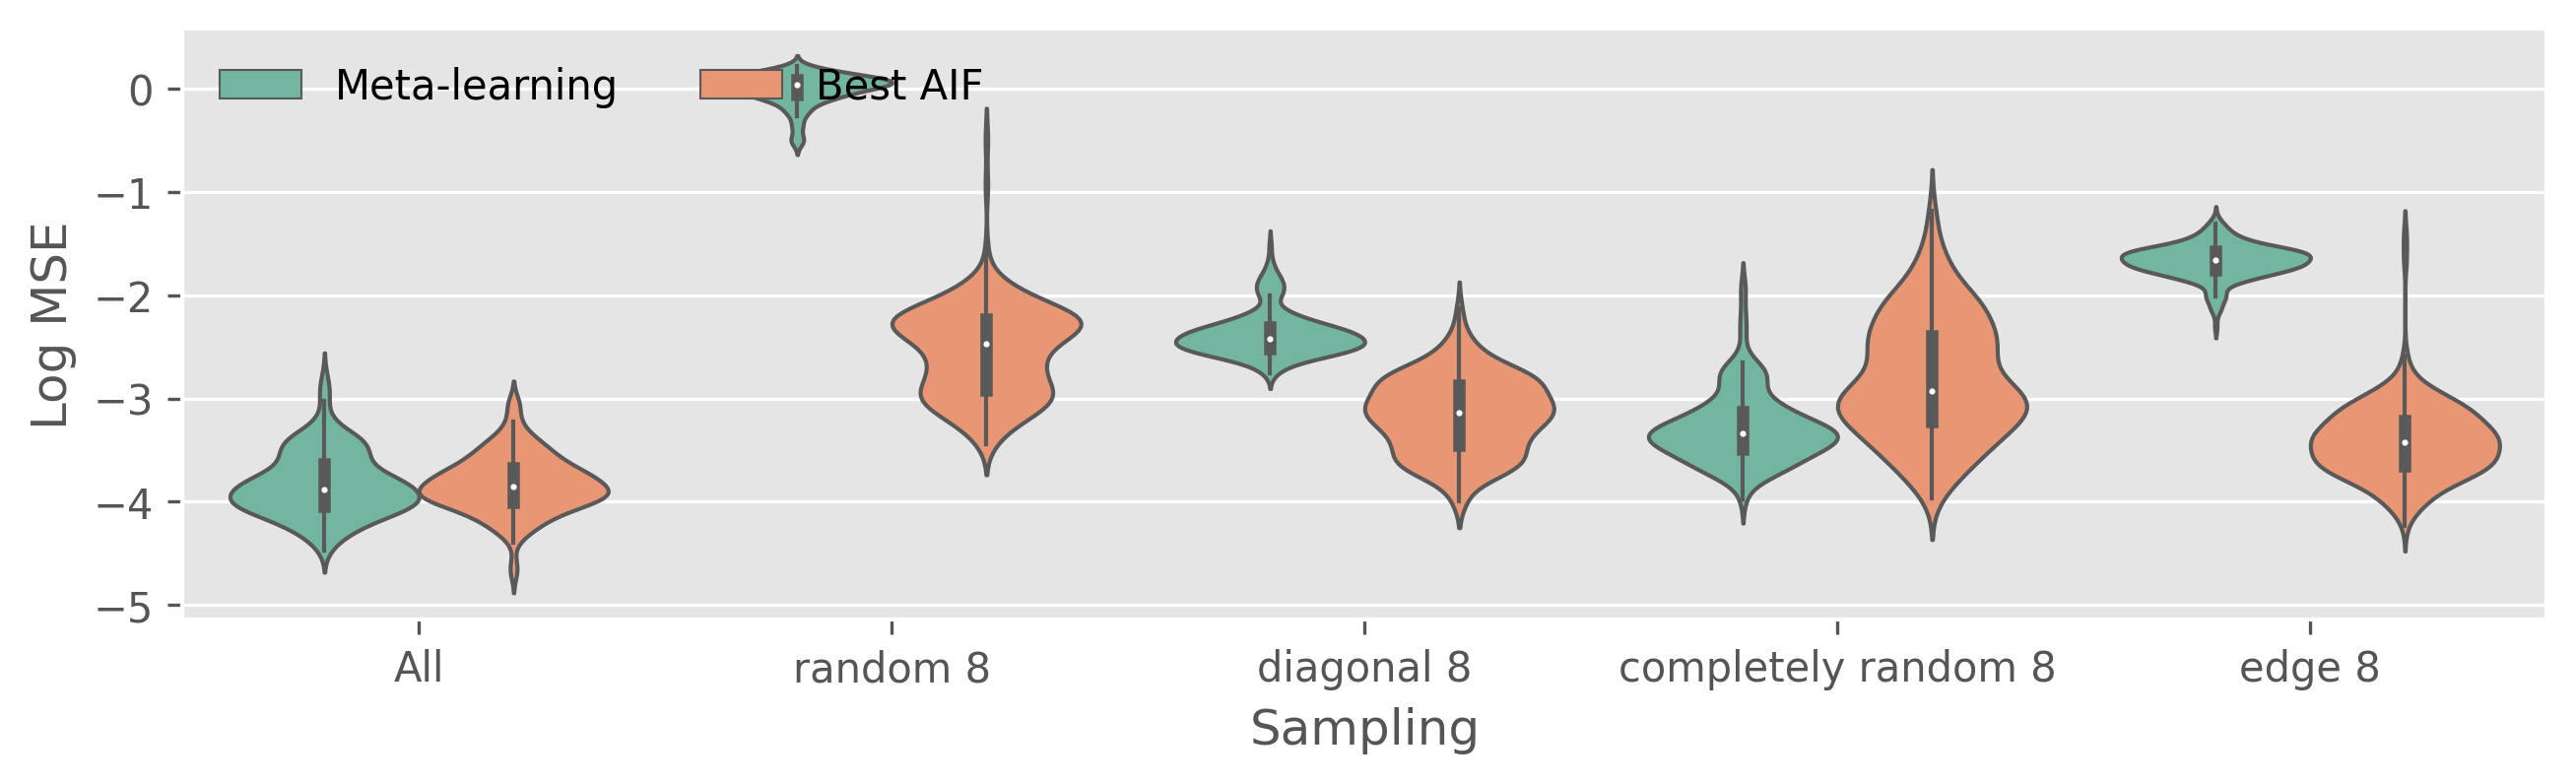

In [6]:
df1 = pd.DataFrame(data_h2, columns=columns)

df2 = pd.DataFrame(data_ch4, columns=columns)
print(df1)
print(df2)

fig = plt.figure(figsize=(8, 2), dpi=300)
ax = fig.add_axes([0, 0, 1, 1])
plot = sns.violinplot(ax=ax, data=df1,
                   x="Sampling", y="Log MSE", hue="Model", split=False,
                   palette="Set2", linewidth=1, scale='count')


plot.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=6, fontsize=10, frameon=False)


plt.savefig('performance_h2.pdf', format='pdf', bbox_inches='tight')


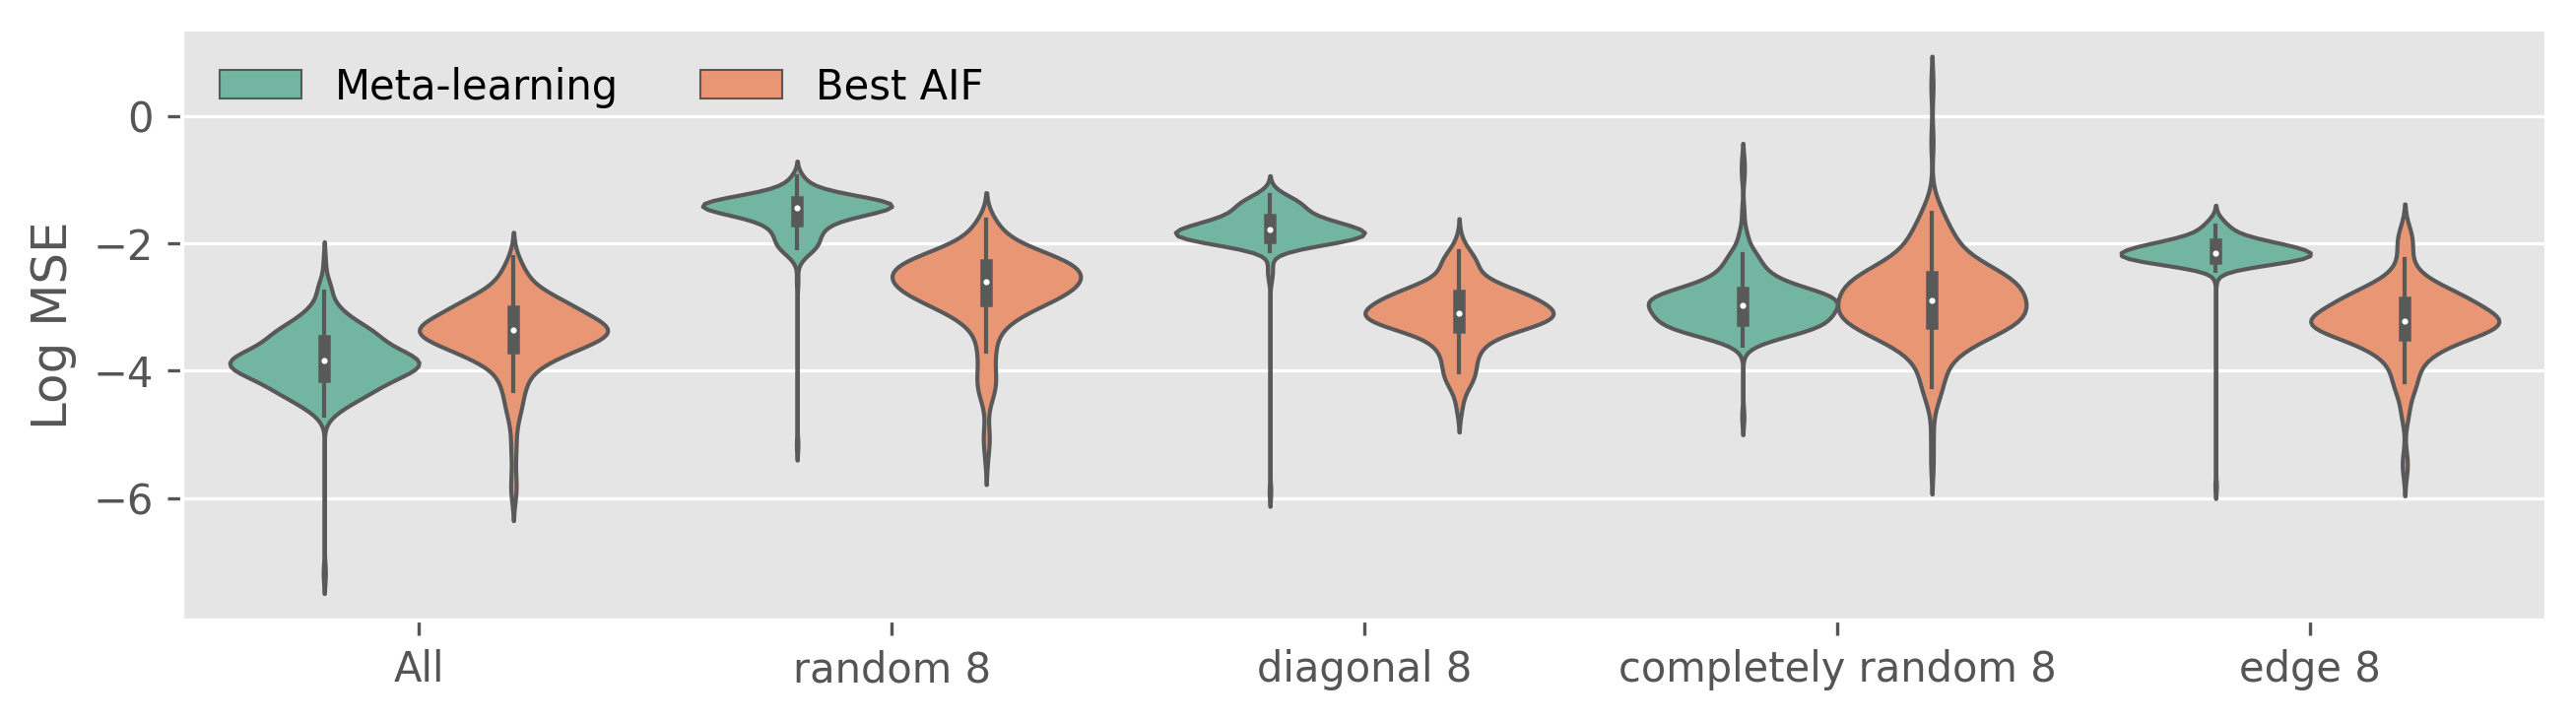

In [7]:


fig = plt.figure(figsize=(8, 2), dpi=300)
ax = fig.add_axes([0, 0, 1, 1])
plot = sns.violinplot(ax=ax, data=df2,x="Sampling", y="Log MSE", hue="Model", split=False,palette="Set2", linewidth=1, scale='count')
ax.set_xlabel("")
plot.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=6, fontsize=10, frameon=False)

plt.savefig('performance_ch4.pdf', format='pdf', bbox_inches='tight')